<a href="https://colab.research.google.com/github/kristianJW54/ML-AI-Models-Projects/blob/main/Multiple_Linear_Regeression_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

**Importing Data and Analysing Relationships**

In [ ]:
path = "/content/sample_data/california_housing_train.csv"
data = pd.read_csv(path)

data.head()

def categorize_age(age):
    if age < 30:
        return "new"
    elif age < 50:
        return "medium"
    else:
        return "old"


# Create a new column for age ranges
data["age_range"] = data["housing_median_age"].apply(categorize_age)


data = data.dropna(axis=0).reset_index()

data.head()


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_range
0,0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,new
1,1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,new
2,2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,new
3,3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,new
4,4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,new


In [ ]:

# Create a OneHotEncoder for the categorical column
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical column
X_encoded = encoder.fit_transform(data[["age_range"]])

# Get the column names
column_names = encoder.get_feature_names_out(["age_range"])

# Create a DataFrame from the encoded values with proper column names
encoded_df = pd.DataFrame(X_encoded, columns=column_names)

encoded_df.head()


,age_range_medium,age_range_new,age_range_old
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [ ]:
#Add encoded columns to the feature matrix

# Select features
X_numeric = data[["median_income"]].reset_index(drop=True)

#Standardize the features by selecting the numeric features in the array

def standardize(data):
  mean = data.mean(axis=0)
  std = data.std(axis=0)
  scaled = (data - mean) / std
  return scaled

X_scaled = standardize(X_numeric)

# Concatenate the existing features with the encoded features
X_combined = pd.concat([X_scaled, encoded_df], axis=1)

# Display the resulting feature matrix X_combined
print(X_combined.head())



   median_income  age_range_medium  age_range_new  age_range_old
0      -1.252506               0.0            1.0            0.0
1      -1.081451               0.0            1.0            0.0
2      -1.170071               0.0            1.0            0.0
3      -0.362590               0.0            1.0            0.0
4      -1.026424               0.0            1.0            0.0


In [ ]:
#Simplify the variable matrix names

X = np.array(X_combined)
y = data["median_house_value"]

#Add intercept term of 1s to start of features matrix
# Add a column of 1's at the beginning
X = np.hstack([np.ones((X.shape[0], 1)), X])

print(f"Initial Shape of X: {X.shape}")
print(f"Initial Shape of y: {y.shape}")

print(X)

Initial Shape of X: (17000, 5)
Initial Shape of y: (17000,)
[[ 1.         -1.25250632  0.          1.          0.        ]
 [ 1.         -1.08145117  0.          1.          0.        ]
 [ 1.         -1.17007074  0.          1.          0.        ]
 ...
 [ 1.         -0.44665     0.          1.          0.        ]
 [ 1.         -0.99775783  0.          1.          0.        ]
 [ 1.         -0.45534949  0.          0.          1.        ]]


#Formula For Multiple Regression
##Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε


 
Initial Coefs: [-1.19425057 -2.3318627  -0.83473603 -0.14078015 -0.70657258]
 
Initial Coef Shape: (5,)
Initial X Shape: (17000, 5)
Final Coefficients: [157187.0438921   81289.09797188  61194.15529727  38020.41501404
  57971.98574259]
Final Coefficient shape: (5,)


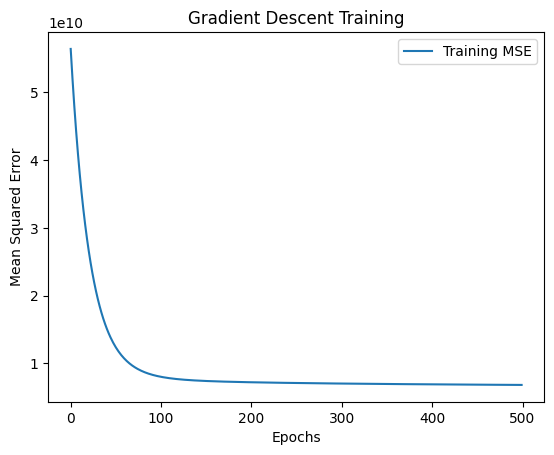

In [ ]:


lr = 0.000001
epochs = 500
mse_list = []

#Create vector for coefficients

coef = np.random.randn(X.shape[1])
print(" ")
print(f"Initial Coefs: {coef}")
print(" ")
print(f"Initial Coef Shape: {coef.shape}")
print(f"Initial X Shape: {X.shape}")

def mse_func(y, y_hat):
  return np.mean((y-y_hat)**2)


#Gradient Descent
for i in range(epochs):

  #Get predictions
  predictions = np.dot(X, coef)

  error = y-predictions

  #Calculate Gradient
  gradient = np.dot(X.T, error)

  #Update the coefs
  coef += lr * gradient

  mse = np.mean((y-predictions) ** 2)

  mse_list.append(mse)

  # Print the MSE at every 100 epochs for debugging
  # if i % 100 == 0:
      # print(f"Epoch {i}, MSE: {mse}")


print(f"Final Coefficients: {coef}")
print(f"Final Coefficient shape: {coef.shape}")

plt.plot(range(epochs), mse_list, label='Training MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Training')
plt.legend()
plt.show()




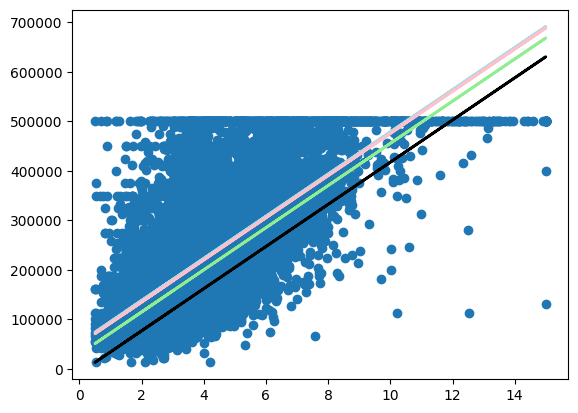

In [ ]:
#Plotting the lines
#Final Coefficients: [157187.52156185 | 81289.10556451 | 61193.70266872 | 38019.87799163 | 57971.95925386]
f_new = coef[0] + coef[1] * X_combined[["median_income"]] + coef[2] * 0 + coef[3] * 1 + coef[4] * 0
f_medium = coef[0] + coef[1] * X_combined[["median_income"]] + coef[2] * 1 + coef[3] * 0 + coef[4] * 0
f_old = coef[0] + coef[1] * X_combined[["median_income"]] + coef[2] * 0 + coef[3] * 0 + coef[4] * 1
base = coef[0] + coef[1] * X_combined[["median_income"]] + coef[2] * 0 + coef[3] * 0 + coef[4] * 0


actual = data[["median_income"]]

# Scatter plot of the data
plt.scatter(data['median_income'], data['median_house_value'], label='Data Points')
plt.plot(actual, f_new, linewidth = 2, color = "lightgreen")
plt.plot(actual, f_medium, linewidth = 2, color = "lightblue")
plt.plot(actual, f_old, linewidth = 2, color = "pink")
plt.plot(actual, base, linewidth = 2, color = "black")




plt.show()


